# Practical 1: Spiral Growth and Impurities in Calcite

'Classical' crystal growth proceeds via the addition of mono-atomic layers to a crystal surface.
This growth mechanism is termed 'Terrace-Ledge-Kink' (TLK), 'Terrace-Step-Kink' (TSK) or 'Kossel Model' growth.

The crystal-solution interface is unstable relative to the bulk crystal, so the free energy change associated with attaching a new ion to the crystal surface ($\Delta G_A$) is the sum of the energy changes associated with creating a new interface ($\Delta G_I$) and adding mass to the solid ($\Delta G_S$):
$$
\Delta G_{A} = \Delta G_{I} - \Delta G_{S}
$$
The most favourable atachment site for new ions is the one that maximises the increase in bulk volume while minimising the increase in surface area.

If the starting state is an atomically flat crystal face, the first stage in crystal growth is to create step sites where additional atoms may attach.
This process is known as 2D nucleation, involving the creation of 'islands' on the surface.
2D nucleation can be considered as a microscopic extension of heterogeneous nucleation on a perfect template (i.e. the interfacial energy between nucleus and substrate is zero).
At a given saturation the nucleus is stable when it exceeds a critical size and conversely, a nucleus of given size (e.g. mono-atomic addition) requires a degree of over-saturation to be stable.
For example, consider the attachment of a monomer to the crystal surface approximated as a cuboid with dimensions $a$, $b$, $c$.
The change in free energy associated with attaching this monomer is $\Delta \mu$, and the interfacial energy is:
$$
\Delta G_I = \gamma (2 a c + 2 b c) \\
\Delta G_A = \gamma (2 a c + 2 b c) - \Delta \mu
$$
Where $\gamma$ is the interfacial energy term.
The addition of a monomer is will be stable when $\Delta G_A = 0$.

**Derive an expression to calculate the saturation where a monomer is stable on the surface (recall that $\Delta \mu = k_B T \sigma$):**

This is a 'markdown' cell - you can write equations between '$$' symbols using LaTeX notation, for example:

$$
a = b
$$

Or you can just do this on paper...

Extending the same principles 1D nucleation describes the attachment of atoms to step edges to form kink sites.
A 1D nucleus is bounded on two sides by a 'perfect' template, which again reduces the energy barrier to nucleation.
Once formed, a 1D nucleus provides two adjacent kink sites that are bounded on three sides by existing crystal.
These kink sites may then propagate along the step, advancing the step.

**Write expressions for the saturation at which 1D nucleation and kink attachment are stable:**

another 'markdown' cell, if you want it.

1. **Which type of attachment has the highest energy barrer?** 

Crystal growth progresses largely through imperfections in crystal structure, which generate a continual source of kink sites on the surface.
A particularly important type of dislocation is a *screw dislocation*.

Screw dislocations are misalignments in the lattice structure which cause the edge of an atomic layer to protrude above the crystal surface.
This protrusion provides a permanent step edge where the energy barrier to 2D nucleation does not have to be overcome.
The addition of atoms to dislocations produces characteristic chiral growth patterns on the surface, as can be seen in [Atomic Force Microscopy (AFM)](https://en.wikipedia.org/wiki/Atomic_force_microscopy) analyses of growing mineral surfaces (Teng et al., 1998).

<img src="Figs/TengSpiral.png" style="width: 40%; max-width: 600px;"></img>

These AFM images show a new growth spiral developing around a dislocation site, and how these patterns correspond to the crystal structure of calcite.
Growth proceeds in three directions (a) until a new edge exceeds a critical length, becomes stable, and also begins to grow (b).
Note also in (b) the upper corner is not completely formed, and a 'kink' site is visible.
The steps provide a substrate for 1D nucleation which creates a kink site that propagates along the length of the step, advancing that step.

Growth around dislocations developes a spiral that is characterised by step velocity (v), terrace width (W) and height (h), step length (L) and growth rate (R<sub>f</sub>), which is a function of v, h and W ($R_f = v h / W$).

<img src="Figs/TLK.png" style="width: 30%; max-width: 400px;"></img>from DeYoreo and Velikov (2003)

1. **Without growth dislocations, which type of nucleation determines the energy barrier to crystal growth?**
2. **In the presence of growth dislocations, which type of nucleation dictates the energy barrier to step advancement?**

**Kinetic Aside:** 
Addition of an atom to a kink site is always thermodynamically favourable in a supersaturated solution, but frequently it does not happen. 
This is because the stability of that attachment site is only half the story; the kinetics of ions moving through fluid, and attaching and detaching from the crystal face can also play a key role in growth from solutions. 
Energy barriers to the *desolvation* of ions from solution can be a primary barrier to ion attachment, and the structure of water in crystal-fluid interfaces can play a major role.

## Part 1. Growth Spirals

The geometry of a growth spiral (W, and therefore side steepness) depends upon the rate of growth from solution (R<sub>f</sub>, and ultimately saturation, $\sigma$).
These AFM images from Davis et al (2004) show growth spirals on the surface of calcite growing in solutions with higher (A) and lower (B) saturation. 
Not the difference in terrace width (here labelled $\lambda_+$, same as W), between the two saturation levels.

![Spiral Growth](Figs/Davis_Spirals.jpg)

Image field of view is 3.5x3 microns.

In the following, we will explore how solution saturation controls the critical step length of the growing spiral and growth velocity, which interact to determine terrace width. These parameters interact with the crystal structure to ultimately determine the shape of the growth spiral.

### 1.1 Critical Step Length (L<sub>C</sub>)

Teng et al (1998) measured $L_C$ for growing calcite spirals using AFM. The following plot shows how $L_C$ is inversely proportional to solution saturation ($\sigma$) in their data.

In [1]:
# importing a few packages which will be used throughout.
import numpy as np  # numerical Python library
import matplotlib.pyplot as plt  # for plotting
from scipy import optimize as opt  # for fitting a function to data
import load  # data loading functions specific to the practical

(0, 200)

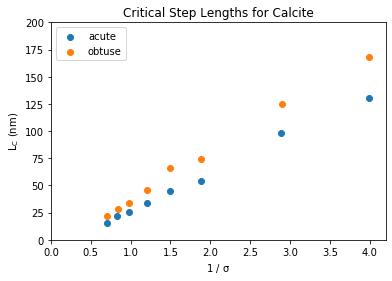

In [2]:
dat_LC = load.Teng_LC()

# this loop looks at the acute and obtuse step data independently
for tp in ['acute', 'obtuse']:
    ind = dat_LC.type == tp  # this creates a boolean index for selecting data
    plt.scatter(dat_LC.loc[ind, '1_sigma'], dat_LC.loc[ind, 'LC'], label=tp)  # this plots ths data separately

# make it look nice
plt.title('Critical Step Lengths for Calcite')
plt.legend()
plt.ylabel('$L_C$ (nm)')
plt.xlabel('1 / $\sigma$')
plt.xlim(0, 4.2)
plt.ylim(0, 200)

^ refer people back to top figure for this.

1. **Why is $L_C$ different for acute and obtuse steps?**
2. **Why in the intecept for both type of step non-zero?**

From these data, it is possible to determine the free energy of step edges and the energy barrier 1D nucleation.

Similar to our consideration of monomer attachment above, the free energy of a step edge is given by:
$$
\Delta g_{\pm} = 2 c \gamma_{\pm} - \Delta \mu \frac{L}{b} 
$$

where:
- $\sigma$ is saturation (unitless)
- $k_B$ is the Boltzmann constant (8.617333262145e-5 eV K<sup>-1</sup>) 
- $T$ is temperature in Kelvin (298.15 K)
- $\Delta \mu$ is the change in chemical potential per molecule (eV)
- $\Delta g$ is the free energy of an acute ($-$) or obtuse ($+$) step edge.
- $L$ is the step length
- $b$ is the intermolecular distance along the step (6.4 $\overset{\circ}{\mathrm {A}}$)
- $c$ is the intermolecular distance between the rows (3.2 $\overset{\circ}{\mathrm {A}}$)
- $\gamma_{\pm}$ is the free energy of an acute ($-$) or obtuse ($+$) step (eV).

Using the data above, derive an expression for $L_C$ as a function of saturation, and determine:
1. **The free energies of obtuse and acute step edges of calcite.**
2. **The free energy barrier to the formation of 1D nuclei ($\Delta g_{1D}$) on step edges (where $L_C = 0$)**

### Hints:
- The critical lengh of the step is when its contribution to the free energy of the solid is zero.
- Derive an equation that relates $L_C$ to $1/\sigma$, then determine the values by least-squares fitting.
- You'll have to treat the acute and obtuse data separately.
- Watch your units!

### 1.1 Solution

In [ ]:
# To get you started, here's the framework of a function:
def critLen(A, B, C):
    b = 6.4e-1  # calcite intermolecular distance along step (nm)
    c = 3.2e-1  # calcite intermolecular distance between rows (nm)
    kB = 8.617333262145e-5  # Boltzman constant eV K-1
    T = 298.15  # K
    
    critical_length = # write your expression here.
    
    return critical_length


# you'll need to fit your function to the data - I suggest using opt.curve_fit to do this.

# write your code here. 

### 1.2 Step Velocity

We've just seen how a step will only advance when it exceeds a critical length.
A second key variable that determines the geometry of a growth spiral is the velocity of an advancing step ($v$).

1. **What factor(s) would you expect to $v$ to depend on?**

The code below produces a plot of the relationship between step velocity ($v$) and saturation ($\sigma$).

In [ ]:
dat_v = load.Teng_v()

for tp, m in zip(['acute', 'obtuse'], ['o', 's']):
    ind = dat_v.type == tp
    plt.scatter(dat_v.loc[ind, 'sigma'], dat_v.loc[ind, 'v'], marker=m, label=tp)
    
plt.xlabel('$\sigma$')
plt.ylabel('v (nm/s)')
plt.legend()

1. **What else might influence step velocity apart from $\sigma$?**
2. **Would you expect there to be a difference in $v$ between acute and obtuse steps? Is there?**

To explore the additional control on step velocity, we must remove the effect of saturation from the data.

The growth velocity for a step with infinite length is described by:

$$
v_{\infty} = \Omega \beta (\alpha - \alpha_e) \tag{3}
$$

Where $\Omega$ is the volume per growth unit (approximated as a cube), $\beta$ is the 'kinetic coefficient' (capturing kinetic energy barriers to attachment from solution) and $\alpha$ is the activity of the growth unit in solution.
This can also be expressed as a function of supersaturation:
$$
\sigma = \ln{\frac{\alpha}{\alpha_e}}
$$

Using this equation and the expression for $L_C$ you derived above:
1. **Calculate theoretical $v_{\infty}$ and $L_C$ for all data.**
2. **Plot $v$ as a proportion of $v_{\infty}$ against $L$ as a proportion of $L_C$.**

Key additional parameters for calcite:
 - $h$ is the step height (3.2 $\overset{\circ}{\mathrm {A}}$)
 - $K_{sp}$ is the equilibrium solubility product ($10^{-8.54}\ mol^{2} kg^{-2}$)
 - $\beta$ is the calcite kinetic coefficient (measured at 0.3-0.5 cm/s, depending on solution chemistry)

Note that the solution is equimolar, allowing $\alpha_i$ to be derived from $K_{sp}$.

### 1.2.1 Solution

In [ ]:

# write your code here


After the inflence of saturation is removed, you should see an asymptotic relationship between step velocity and step length that is independent of saturation and step type.

1. **Why is step velocity lower when the steps are short?**

This is a manifestation of the Gibbs-Thomson effect, which predicts a length-dependent step velocity (De Yoreo & Vekilov, 2003):

$$
v(L) = v_{\infty}\left( 1 - \frac{e^{\sigma L_c / L} - 1}{e^{\sigma} - 1} \right) \tag{4}
$$

Compare the prediction of this expression to the observed relationship in the data.

### 1.2.2 Solution

In [ ]:

# write your code here


1. **How does the observed data differ from the Gibbs-Thomson prediction?**
2. **Why doesn't Gibbs-Thomson do a good job of predicting the data?**

### 1.3 Terrace Width

The interaction of $L_C$ and $v$ determine terrace width ($W$) which, in combination with the lattice geometry, determines the shape of the growth spiral.

For example, consider an isotropic cube where $v=0$ when $L < L_C$ and jumps discontinuously to $v=v_{\infty}$ when $L = L_C$. In this case, the terrace width would then be given by $W = 4L_C$.

<img src="Figs/isotropic_spiral.png" style="width: 30%; max-width: 300px;"></img>

However, as we've seen above $v$ does not increase instantaneously to $v_{\infty}$, rather $v/v_{\infty}$ increases gradually as a function of $L/L_C$.
The increased $v$ of larger steps will lead to a the terraces becoming broader than we would expect in an idealised isotropic case by a $\sigma$-sensitivie multiplier is termed the 'Gibbs factor'.
This makes terrace width considerably more complex, as the extension rate of each step depends on the length-dependent growth velocities of each adjacent step (Eqn. 4).
The extension rate of any step is given by:

$$
\frac{\delta L_N}{\delta t} = v_{\infty} \left( \frac{e^{\sigma L_C / L_{N-1}} - 1}{e^{\sigma} - 1} \right) + v_{\infty} \left( \frac{e^{\sigma L_C / L_{N+1}} - 1}{e^{\sigma} - 1} \right)
$$

This ultimately yields a Gibbs factor of ~2.4, predicting a stable terrace width of $\sim 9.6 L_C$.

Think about the resulting relationship between $W$ and $\sigma$:
1. **Should $W$ increase or decrease with $\sigma$?**
2. **Would you expect this relationship to be more similar to the isotropic or Gibbs factor case, or something else entirely?**

**Make a plot of terrace width compared to supersaturation, and compare the predictions of the isotropic and Gibbs factor predictions.**

In [ ]:
dat_W = load.Teng_W()

# write code to plot the data and model predictions here

1. **Which model does a better job?**
2. **Why?**

## Exercise 2: Impurities in Calcite Growth

The processes above occur in pure solutions containing only the constituents of the crystal and will produce perfect crystal structures. 
This is extremely rare in nature, and things start to get interesting when impurities interfere with crystal growth processes.
For example, calcite grown in the presence of organic molecules and foreign ions take on a wide range of non-rhombohedral forms: 

<img src="Figs/growth_morphology.png" style="width: 30%; max-width: 400px;"></img>

Image from Meldrum & Hyde (2001), showing the influence of malic acid and Mg on calcite morphology. Scale bars in microns.

In most cases the impurities inhibit crystal growth, and their interaction with the surface of the crystal leads to the emergence of complex crystal geometries. 

As an example, we'll consider the simple case of Mg interaction with calcite growth:

<img src="Figs/Davis_Spirals_Mg.jpg" style="width: 30%; max-width: 300px;"></img>

Image field of view is 3.5x3 microns.

This crystal was grown in the same experiment as (B) above, but with the addition of Mg to the solution.

1. **What are the main differences in spiral morphology in the presence of Mg?**
2. **Why might the influence of Mg vary across the spiral structure?**

### Mechanisms of Inhibition

There are four primary mechanisms of growth modification by impurities, each of which has a distinct effect on the relationship between step velocity and impurity incorporation.
These mechanisms may influence the thermodynamics of solid-solution equilibrium by altering solid or solution structure, the kinetics of molecule attachment and/or detachment from the surfice, or a mixture of both.


#### 1. Step Pinning

Step pinning describes the blocking of step progression by impurities that are adsorbed onto the crystal surface.
If an advancing step cannot incorporate or dislodge these impurities its progress is blocked, and it must grow *past* the them and re-form on the other side.
Growing past a pinning impurity bears an energy cost analogous to 2D nucleation: the step growing between the pinning impurities will acquire a curvature, increasing the edge length and destabilising the growing edge.
Therefore, the step only grows past the impurities if the gap between the impurities is smaller than twice the critical radius ($L_i > 2r_c$).
Following Gibbs-Thomson, the act of growing past these impurities will slow the growth of the crystal.
However, as soon as the step has advanced past the impurities, it rapidly regains its maximum growth velocity.

<img src="Figs/step_pinning.png" style="width: 30%; max-width: 400px; min-width: 300px;"></img>

The process is show schematically above, but the mathematics are rather complex. If you're interested, take a look at [Voronkov and Rashkovich (1994)](https://doi.org/10.1016/0022-0248(94)90018-3).

1. **What does the critical radius ($r_c$) depend on?**
2. **What are the ideal characteristics of a step-pinning impurity?**
3. **Is Step Pinning inhibition primarily governed by thermodynamic or kinetic factors?**

#### 2. Incorporation

Crystals can accommodate impurities in their structure.
In this case, differences in the size and shape of the impurity compared to the host constituent destabilise the mineral (increases free energy), increasing mineral solubility.
This process effectively increases the $K_{sp}$ of the crystal, decreasing $\sigma$.
This manifests as a systematic decrease in step velocities, which cannot be overcome by increasing solution saturation:

<img src="Figs/incorporation.png" style="width: 30%; max-width: 400px;"></img>

1. **What factors determine how compatible an impurity is in a crystal?**
2. **What characteristics would an incorporated impurity that maximally inhibits growth have?**
3. **Is Incorporation inhibition primarily governed by thermodynamic or kinetic factors?**
4. **Why is incorporation inhibition not overcome by increasing bulk solution saturation?**

#### 3. Kink Blocking

Kink blocking describes the strong binding of impurities to kink sites, preventing the attachment of the primary ions and stopping the advancement of the kink site along the step edge.
For example Mg might attach readily to Ca kink sites but be difficult to detach.
If Mg were incompatible with the crystal structure it would both prevent the subsequent addition of CO<sub>3</sub><sup>2-</sup>, as well as blocking the attachment of Ca thus stopping kink progression.
The net effect of kink blocking is to reduce the kinetic coefficient ($\beta$, Eq. 3) as a function of impurity concentration, thus reducing step velocity.

<img src="Figs/kink_blocking.png" style="width: 30%; max-width: 400px;"></img>

1. **What are the ideal characteristics of a kink-blocking impurity?**
2. **Is Kink Blocking primarily governed by thermodynamic or kinetic factors?**

#### 4. Surfactants

The interaction of surfactants with a crystal surface is complex.
They tend to be large, complex molecules which cannot be incorporated into the crystal.
They may modify growth by binding to the surface to directly interfere with growth dynamics, or modify the hydration structure of the surface water layer changing local chemistry.
The complexity of these molecules can give them a high degree of specificity to crystal faces, making them highly effective modifiers of crystal geometry.

<img src="Figs/surfactant.png" style="width: 30%; max-width: 400px;"></img>

1. **Would you expect the action of surfactants to be predominantly thermodynamic or kinetic?**

### Mechanism of Mg Inhibition

Davis et al (2000) used AFM to measured $v$ as a function of Ca activity in the presence of varying Mg concentrations.
The code below creates a plot of their data.

In [ ]:
dat_Davis = load.Davis_v()

fig, ax = plt.subplots(1,1)
cb = ax.scatter(dat_Davis.loc[:, 'aCa'] * 1e6, dat_Davis.loc[:, 'v'], c=dat_Davis.loc[:, 'xMg'])
fig.colorbar(cb, label='xMg')
ax.set_xlabel(r'$\alpha Ca^{2+}$')
ax.set_ylabel('v (nm/s)')

1. **Which of the above inhibition mechanisms best describes the influence of Mg on calcite growth?**

In [ ]:

# you may want to play around with the data and plot things here?


## Further Reading

- [Principles of Crystal Nucleation and Growth. De Yoreo and Velikov (2003). *Reviews in Mineralogy and Geochemistry*](https://pubs.geoscienceworld.org/msa/rimg/article/54/1/57/87490/Principles-of-Crystal-Nucleation-and-Growth)
- [Thermodynamics of Calcite Growth: Baseline for Understanding Biomineral Formation. Teng et al (1998), *Science*](http://www.doi.org/10.1126/science.282.5389.724)
- [The Role of Mg<sup>2+</sup> as an Impurity in Calcite Growth. Davis et al. (2000), *Science*](http://www.doi.org/10.1126/science.290.5494.1134)